# Sentiment Analysis of Tweets.

*By Harsha Vardhan Bollineni, December, 2023*

# Introduction

We aim to conduct Twitter sentiment analysis, which involves assessing the sentiment of tweets and assigning a toxicity score of 0 for negative tweets, 2 for neutral ones, and 4 for positive tweets[2]. This analysis holds significant importance in various contexts.For brands, it offers a means to manage their reputation and monitor their online image. Additionally, it aids in identifying and addressing troll accounts, particularly those that engage in excessive and widespread trolling, including potentially harmful bot accounts that can be reported or blocked. In the realm of social analysis, this sentiment analysis plays a crucial role. Social media platforms are increasingly utilized for political campaigns and agendas. We've witnessed the profound influence of social media on public perceptions of various issues[3]. Therefore, sentiment analysis can assist in scrutinizing and discerning whether these campaigns have political motivations, such as spreading discord and animosity.

To conduct this analysis, we'll start by breaking down the text into individual words and eliminating common stop words. We'll then utilize a range of machine learning algorithms for tweet classification. Our approach will involve the application of Natural Language Processing (NLP) technique using transformer models such as BERT. Once these steps are completed, we'll proceed with training the model and assessing its performance using various metrics. Additionally, we intend to leverage deep learning architectures such as Bi-Directional Long Short-Term Memory (LSTM) to enhance the accuracy and effectiveness of the analysis.
In BERT model, we use different optimizers like AdamW, SGD to compare the the performance of the transformer model against different optimizers.

In our performance evaluation against the dataset, the BERT transformer model emerged as the superior performer, demonstrating higher accuracy and more effective classification compared to the bi-directional LSTM model. The term "accuracy" here refers to the ability of the models to correctly predict the sentiment labels for the given tweets.

The BERT transformer model, known for its state-of-the-art performance in natural language processing tasks, outperformed the bi-directional LSTM in terms of accurately categorizing tweets into their respective sentiment classes: negative (0), neutral (2), and positive (4). This superior performance suggests that the BERT model captured intricate contextual relationships and nuances within the tweets, enabling it to make more accurate predictionsOn the other hand, while the bi-directional LSTM achieved decent accuracy, it fell short compared to the BERT transformer. The term "decent accuracy" implies that the LSTM model still performed reasonably well in classifying sentiments, but it did not reach the same level of accuracy and effectiveness as the BERT model.In summary, our comparative analysis indicates that the BERT transformer model is a more powerful tool for Twitter sentiment analysis in this context, providing better accuracy and classification capabilities. The choice between models ultimately depends on the specific requirements of the sentiment analysis task and the trade-offs between model complexity and performance.

# Dataset and Preprocessing

The Sentiment140 dataset[2], a valuable resource for Twitter sentiment analysis, encompasses a vast collection of approximately 1.6 million tweets, making it one of the largest and diverse datasets in this domain. The dataset, available on Kaggle, is meticulously categorized into two sentiment classes: positive and negative. Each tweet within the dataset is annotated based on the prevailing sentiment it conveys, providing a rich and varied set of instances for training and evaluating sentiment analysis models. Originating from diverse Twitter users, the dataset captures sentiments expressed across a spectrum of topics and domains, contributing to the robustness and applicability of models trained on this data. Researchers and practitioners often leverage the Sentiment140 dataset for its scale and comprehensiveness, making it a benchmark dataset in the field of sentiment analysis and natural language processing. The dataset's accessibility on Kaggle facilitates easy exploration and utilization, fostering advancements in sentiment analysis methodologies and techniques. We have taken a subset of the dataset as 1.6 million tweets consumed a lot of computational hours and time for preprocessing and training the model. So we have taken, 10000 tweets to perform the analysis. Data cleaning is a crucial step to be done before the data is fed into any deep learning model to ensure the accuracy and reliability of results. Poor-quality or noisy data can lead to biased sentiment predictions and misinterpretations. Data cleaning involves techniques to preprocess and refine the text data, addressing issues such as noise in data, presence of duplicates, imbalanced data, missing features, etc.The text data from the Sentiment140 dataset was first pre-processed by applying techniques such as tokenization, stemming, stop-word and punctuation removal. By performing tokenization only the top 5,000 most frequent words in the text data were considered, ignoring the less frequent ones. This is done to manage the vocabulary size and focus on the most significant words in the dataset, which can help improve the efficiency of text processing and modeling. Stemming in data preprocessing involves reducing words to their root form to simplify analysis by normalizing variations of words by removing prefixes or suffixes. Stemming and stopword removal was done using the Natural Language Toolkit (NLTK) library.

In our preprocessing pipeline, we enforce a uniform length of 250 words for each tweet to ensure consistent input dimensions for our model. For tweets shorter than 250 words, we employ zero-padding to reach the specified length. This standardization facilitates the model's handling of variable-length inputs.The decision to adopt pre-padding over post-padding is informed by insights from a notable 2019 paper titled "Effects of Padding on LSTMs and CNNs."[4] The research findings highlight a significant impact on LSTM performance based on the padding strategy employed. Specifically, the paper reveals that, unlike in Convolutional Neural Networks (CNNs), pre-padding substantially outperforms post-padding in terms of accuracy. The observed accuracy rates underscore the importance of this choice, with pre-padding exhibiting a notably higher accuracy of 80.321%, compared to the comparatively lower accuracy of 50.117% associated with post-padding when applied to LSTMs.
Furthermore, to facilitate robust model evaluation, we partition the dataset into training and test sets, maintaining an 80:20 ratio. This division ensures a comprehensive assessment of the model's generalization capabilities on unseen data.

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
cols = ["target", "ids", "date", "flag", "user", "text"]
data_encoding = "ISO-8859-1"

In [ ]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=data_encoding, names=cols)

In [ ]:
data.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
len(data)

1600000

In [ ]:
datasub1=data.head(1000)
datasub2=data.iloc[990000:1000000]
dataset=pd.concat([datasub1,datasub2], ignore_index=True)

In [ ]:
len(dataset)
dataset

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
10995,4,1879942807,Thu May 21 23:36:19 PDT 2009,NO_QUERY,divabat,"@healingsinger thank you, i needed that"
10996,4,1879942922,Thu May 21 23:36:20 PDT 2009,NO_QUERY,nick1975,@vactress http://bit.ly/cADea Maybe this is m...
10997,4,1879942975,Thu May 21 23:36:21 PDT 2009,NO_QUERY,znmeb,"@Brat13 Hell, Windows 7 will be out of my pric..."
10998,4,1879943113,Thu May 21 23:36:22 PDT 2009,NO_QUERY,virmani,@jigardoshi neah.. i wish! just reminiscing r...


We can see the values of our dataset here. The tweets which are negative in sense are rated 0 while the ones rated 4 have typically positive tweets.


In [ ]:
dataset['target'].unique()

array([0, 4])

In [ ]:
dataset['target'] = dataset['target'].replace(4, 1, inplace = False)

In [ ]:
dataset['target'].unique()

array([0, 1])

In [ ]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
stop_words = nltk.corpus.stopwords.words("english")
stemmer = nltk.stem.SnowballStemmer("english")

In [ ]:
#function to remove stopwords, punctuations, and do stemming as part of data preprocessing.
def preprocess(text):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
          tokens.append(stemmer.stem(token))
    return " ".join(tokens)

In [ ]:
dataset.text = dataset.text.apply(lambda x: preprocess(x))

In [ ]:
TEST_SIZE = 0.2

In [ ]:
X = dataset['text'].values
Y = dataset['target'].values

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=42)
print("TRAIN size:", len(X_train))
print("TEST size:", len(X_test))

TRAIN size: 8800
TEST size: 2200


We have pre-processed the data and taken a subset such that our test size is 2200 and train size is 8800 for the tweets. As the tweets were arranged according to the classification, we took tweets at random to ensure the coverage of varied data points.
We will now tokenize the data and add it into our X_train and X_test, we are truncating the tweet size to 250 for all the tweets and adding padding incase the tweet size is less than 250.

In [ ]:
# Tokenize data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [ ]:
max_comment_length = 250
X_train = pad_sequences(X_train, padding='pre', maxlen= max_comment_length)
X_test = pad_sequences(X_test, padding='pre', maxlen= max_comment_length)


In [ ]:
embedding_vector_length = 128

In [ ]:
embedding_matrix = tf.Variable(tf.random.uniform([vocab_size, embedding_vector_length], -1.0, 1.0))

# Methods

Sentiment analysis serves as a cognitive tool for discerning the emotional expression within a text, and it stands as an actively explored domain in Natural Language Processing. The main focus of sentiment analysis lies in categorizing and predicting users' sentiments from their reviews. In recent years, numerous deep learning techniques have emerged to achieve this task with the Bidirectional LSTM being a notable neural network architecture. This model addresses long-term dependencies by incorporating memory into the model, thereby enhancing its ability to make more accurate predictions.Sentiment is often context-dependent. The same word may have different sentiments based on the words that surround it. Bi-LSTMs, through their bidirectional sequence processing, adeptly capture contextual details. They are capable of learning representations that take into account the influence of both preceding and succeeding words on the sentiment expressed in a particular part of a sentence. In short, Bi-LSTMs are advantageous for sentiment analysis in NLP due to their ability to capture sequential dependencies, handle variable-length sequences, and provide contextual representations that are crucial for understanding sentiment in the context of natural language.

BERT, or Bidirectional Encoder Representations from Transformers, represents a breakthrough in natural language processing (NLP) and has revolutionized the field of sentiment analysis. Developed by Google, BERT is a transformer-based model that excels in capturing context and understanding the intricacies of language. Its bidirectional nature allows it to consider both preceding and succeeding words when processing a given word, enabling a more comprehensive comprehension of the context in which words appear.

One of BERT's key strengths lies in its pre-training process. BERT is initially trained on a massive corpus of diverse text data, learning to predict missing words in sentences. This unsupervised pre-training imbues BERT with a robust contextual understanding of language, allowing it to grasp subtleties and relationships between words. This pre-trained model can then be fine-tuned on specific tasks, such as sentiment analysis.In the context of sentiment analysis, the fine-tuning process involves training BERT on a labeled dataset where each text is associated with a sentiment label (positive, negative, or neutral). During fine-tuning, BERT adjusts its parameters to better align with the specific sentiment-related patterns present in the training data. This adaptation ensures that BERT becomes proficient in recognizing sentiment cues and nuances relevant to the sentiment analysis task at hand.
When applied to sentiment analysis, BERT excels in handling complex sentence structures, idiomatic expressions, and ambiguous language. Unlike traditional sentiment analysis models that rely on bag-of-words or n-gram approaches, BERT considers the entire context of a sentence, making it particularly adept at capturing sentiment in contextually rich language.Moreover, BERT's ability to understand the relationships between words allows it to discern sentiment even in cases where the sentiment-bearing words are not explicitly stated. We have tested this out in our model using sentences like. "This is not great" and "This is not bad", which often confuse other models but perform well with BERT.This contextual awareness enables BERT to overcome challenges like negations, sarcasm, and sentiment shifts within a sentence.

In practical terms, using BERT for sentiment analysis involves integrating the pre-trained BERT model into a sentiment analysis pipeline. This pipeline typically includes tokenization, where the text is broken into individual tokens, and the application of BERT embeddings to represent the contextual information of each token. These embeddings are then fed into a classification layer to predict the sentiment of the input text.The advantages of using BERT in sentiment analysis include its ability to handle various languages, adapt to domain-specific language, and generalize well to different sentiment analysis tasks. However, it's important to note that BERT's computational demands can be substantial, and deployment considerations should account for the resources required.





# Timeline

We planned the time for our tasks based on division of tasks.This is the timeline and we were able to finish task as per our timeline with a few adhoc tasks being added

|Task | Expected Completion date | Team members |
|--- | --- | --- |
|Clean and pre-process the dataset| 11-03-2023 | Arsha |
|Tokenize and analyze the dataset| 11-05-2023| Shruthi|
|Model design using BERT | 11-07-2023 | Shruthi |
|Model design using Bidirectional LSTM | 11-07-2023 | Arsha |
|Code the models and implement it to check prediction on training data and evaluate using different metrics on the validation dataset | 11-12-2023 | Arsha, Shruthi|
|Observe behaviour on test data and fine tune the models for best results | 11-17-2023 | Arsha, Shruthi |
|Optimize the models  and finish any existing backlog items and document the parameters | 11-25-2023 | Arsha, Shruthi|

We have defined and developed our Bi-directional LSTM model. As can be seen, we have defined our model with multiple layers, used 'relu' activation function and 'sigmoid' for different layers.Using 'relu' for layers introduces non-linearity, allowing the model to learn complex relationships in the data.

The use of 'sigmoid' activation function in specific layers, such as the output layer, is suitable for binary classification tasks as it squashes the output between 0 and 1, representing probabilities. We have trained the model for 15 epochs initially, and achieved a validation accuracy of 0.8945 and a loss of 0.69.

The embedding layer is used to transform input sequences of discrete data, such as words or categorical features, into continuous vector representations. This layer is particularly crucial when dealing with natural language processing (NLP) tasks, where words need to be represented in a format that is compatible with the mathematical operations performed by neural networks.This layer is trainable and when establishing an Embedding layer, the embedding weights undergo initial random initialization, just like any other layer. Through the training phase, these weights undergo gradual adjustments via backpropagation. Upon completion of training, the acquired word embeddings encapsulate approximate similarities between words, tailored to the specific problem for which the model has been trained. The embedding vector length is set as 128 which means that each word in our top 5000 words is represented by a 128 dimensional vector. Using a higher dimensional vector can help learn the model better, however it will take a lot of time for training. Therefore, we have fixed the value of embedding vector length as 128.

We defined the different parameters like epochs = 15, batchsize = 32, learning rate of 0.001.


In [ ]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length , input_length=max_comment_length, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8)]

In [ ]:
hist = model.fit(X_train, Y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/15
275/275 [==============================] - 30s 65ms/step - loss: 0.3079 - accuracy: 0.9081 - val_loss: 0.2939 - val_accuracy: 0.9064
Epoch 2/15
275/275 [==============================] - 11s 41ms/step - loss: 0.2449 - accuracy: 0.9128 - val_loss: 0.2647 - val_accuracy: 0.9118
Epoch 3/15
275/275 [==============================] - 10s 38ms/step - loss: 0.1807 - accuracy: 0.9350 - val_loss: 0.2733 - val_accuracy: 0.9032
Epoch 4/15
275/275 [==============================] - 9s 34ms/step - loss: 0.1319 - accuracy: 0.9540 - val_loss: 0.3064 - val_accuracy: 0.8995
Epoch 5/15
275/275 [==============================] - 10s 35ms/step - loss: 0.0909 - accuracy: 0.9682 - val_loss: 0.4054 - val_accuracy: 0.9023
Epoch 6/15
275/275 [==============================] - 10s 36ms/step - loss: 0.0603 - accuracy: 0.9783 - val_loss: 0.4529 - val_accuracy: 0.8977
Epoch 7/15
275/275 [==============================] - 10s 36ms/step - loss: 0.0406 - accuracy: 0.9859 - val_loss: 0.5943 - val_accuracy: 

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"{loss=} , {accuracy=}")

69/69 [==============================] - 1s 13ms/step - loss: 0.7605 - accuracy: 0.8859
loss=0.7604860067367554 , accuracy=0.8859090805053711


The summary of the Bi-LSTM model is given below. It shows the different layers that constitute this model and the number of trainable and non-trainable parameters of this model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          1339264   
                                                                 
 bidirectional (Bidirection  (None, 250, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
def plot_hist(hist):
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']

  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  plt.figure(figsize=(8, 5))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,2.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

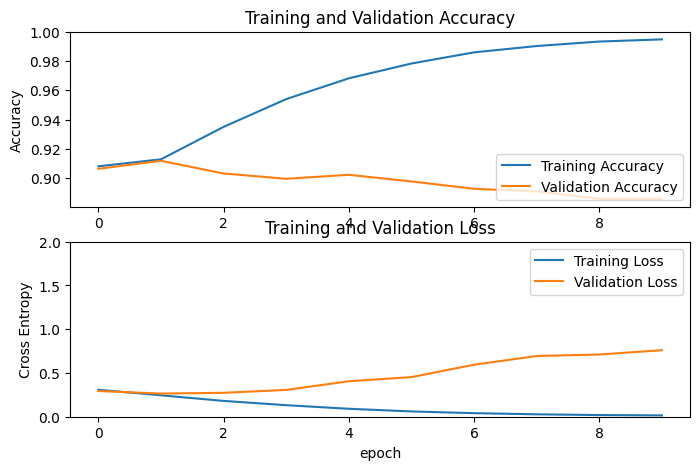

In [ ]:
plot_hist(hist)

This model uses a higher dropout rate of 0.4 to try to tackle overfitting seen in the previous model. A different activation function 'gelu' is used in the dense layer to try to see its impact on accuracy. Also, a different optimizater RMSprop is used with the same learning rate of 0.001

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length , input_length=max_comment_length, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='gelu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist1 = model1.fit(X_train, Y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/15
275/275 [==============================] - 21s 56ms/step - loss: 0.3145 - accuracy: 0.9069 - val_loss: 0.3053 - val_accuracy: 0.9064
Epoch 2/15
275/275 [==============================] - 9s 34ms/step - loss: 0.2885 - accuracy: 0.9098 - val_loss: 0.2858 - val_accuracy: 0.9064
Epoch 3/15
275/275 [==============================] - 10s 35ms/step - loss: 0.2608 - accuracy: 0.9130 - val_loss: 0.2770 - val_accuracy: 0.9100
Epoch 4/15
275/275 [==============================] - 10s 36ms/step - loss: 0.2335 - accuracy: 0.9189 - val_loss: 0.2736 - val_accuracy: 0.9027
Epoch 5/15
275/275 [==============================] - 9s 31ms/step - loss: 0.2027 - accuracy: 0.9295 - val_loss: 0.2924 - val_accuracy: 0.9091
Epoch 6/15
275/275 [==============================] - 10s 35ms/step - loss: 0.1732 - accuracy: 0.9386 - val_loss: 0.3251 - val_accuracy: 0.9059
Epoch 7/15
275/275 [==============================] - 9s 34ms/step - loss: 0.1398 - accuracy: 0.9494 - val_loss: 0.3567 - val_accuracy: 0.

In [ ]:
loss, accuracy = model1.evaluate(X_test, Y_test)
print(f"{loss=} , {accuracy=}")

69/69 [==============================] - 1s 15ms/step - loss: 0.7523 - accuracy: 0.8845
loss=0.7523355484008789 , accuracy=0.8845454454421997


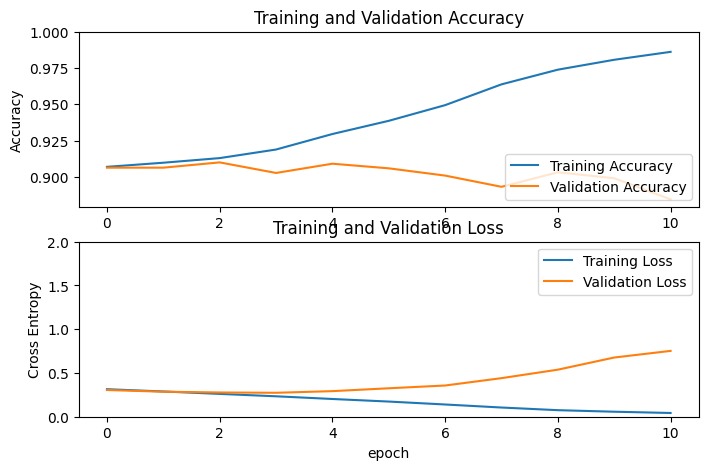

In [ ]:
plot_hist(hist1)

This model uses an even more higher dropout rate of 0.55. Adam optimizer is used again with a slower learning at a learning rate of 0.0001 and is trained for more epochs. Early stopping is provided with fewer patience epochs.

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length , input_length=max_comment_length, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='gelu'),
    tf.keras.layers.Dropout(0.55),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist2 = model2.fit(X_train, Y_train,
                    epochs=17,
                    batch_size=32,
                    validation_data=(X_test, Y_test), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/17
275/275 [==============================] - 33s 71ms/step - loss: 0.3419 - accuracy: 0.9080 - val_loss: 0.3116 - val_accuracy: 0.9064
Epoch 2/17
275/275 [==============================] - 11s 42ms/step - loss: 0.3126 - accuracy: 0.9098 - val_loss: 0.3104 - val_accuracy: 0.9064
Epoch 3/17
275/275 [==============================] - 10s 36ms/step - loss: 0.3098 - accuracy: 0.9098 - val_loss: 0.3093 - val_accuracy: 0.9064
Epoch 4/17
275/275 [==============================] - 10s 37ms/step - loss: 0.3072 - accuracy: 0.9098 - val_loss: 0.3086 - val_accuracy: 0.9064
Epoch 5/17
275/275 [==============================] - 11s 38ms/step - loss: 0.3029 - accuracy: 0.9098 - val_loss: 0.3014 - val_accuracy: 0.9064
Epoch 6/17
275/275 [==============================] - 10s 38ms/step - loss: 0.2907 - accuracy: 0.9098 - val_loss: 0.2886 - val_accuracy: 0.9064


In [ ]:
loss, accuracy = model2.evaluate(X_test, Y_test)
print(f"{loss=} , {accuracy=}")

69/69 [==============================] - 1s 14ms/step - loss: 0.2886 - accuracy: 0.9064
loss=0.28856709599494934 , accuracy=0.9063636660575867


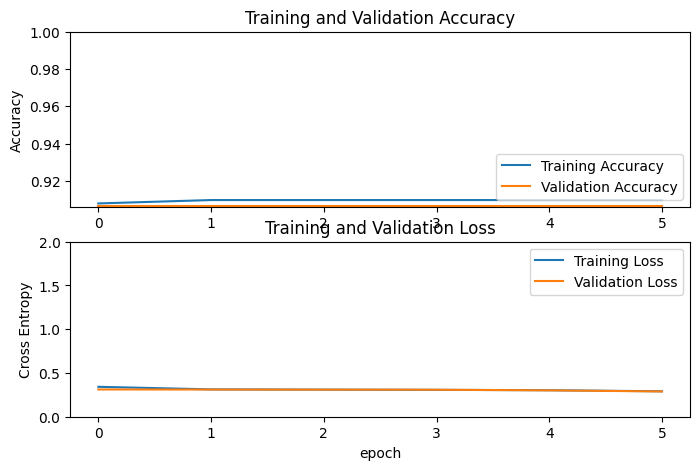

In [ ]:
plot_hist(hist2)

#Results


LSTM ANALYSIS:

In analyzing the performance of the LSTM bidirectional model, it's evident that the achieved accuracy of 89% in model 1 is promising, reflecting the model's ability to correctly classify sentiments in a majority of cases. However, the corresponding loss value of 0.73 unveils a potential concern, a significant discrepancy between the predicted and actual sentiments during training.
The elevated loss value suggests a case of overfitting, where the model may have become too tailored to the intricacies of the training data, hindering its ability to generalize well to new, unseen instances. Overfitting occurs when a model captures noise or specific patterns in the training data that do not apply to the broader dataset. Despite the commendable accuracy, the high loss signals that the model might struggle when exposed to different variations of sentiment expressions. To address this overfitting concern, hyperparameter tuning becomes imperative. Adjusting parameters such as the number of epochs, dropout rates, learning rates, and layer sizes can help strike a better balance between model complexity and generalization. By fine-tuning these parameters, the model can learn more robust and representative features, improving its ability to classify sentiments accurately on unseen data. Early stopping has also been used to reduce overfitting and improve generalization of the model. This involves continuous monitoring of the model's performance on a validation dataset throughout the training phase, with the training process being halted as soon as signs of performance deterioration manifest. The first two models adopted a patience parameter of 8 epochs to diligently observe and assess the validation accuracy. In contrast, the third model, utilizing a patience of merely 5 epochs, demonstrated notable success by achieving a remarkable validation accuracy of 90%, accompanied by a concurrent reduction in loss to 28%. Dropout rate of the dropout layer was also increased to 55% to reduce overfitting.
There also does not seem to be much impact on the model accuracy with changes in optimizer and activation functions. We have tried with Adam and RMSprop optimizers. The activations experimented with on the dense layer are 'relu' and 'gelu'.

A notable observation is the impact of dataset size on model performance. Initially developing the model on a dataset comprising 1.6 million tweets showed promising results. However, due to the associated challenges of extensive computational requirements and time constraints, it became apparent that working with such a large dataset hindered the feasibility of hyperparameter tuning. Reducing the dataset size not only alleviated computational demands but also resulted in an improvement in model accuracy.
This scenario highlights a classic case of overfitting due to limited data. Training on a smaller dataset might have constrained the model's learning capabilities and classification prowess. Balancing the dataset size with the model's complexity is crucial for achieving optimal performance.In moving forward, dedicating efforts to hyperparameter tuning, potentially leveraging techniques like cross-validation, and experimenting with different dataset sizes could lead to a more refined LSTM bidirectional model. This iterative process of experimentation and fine-tuning is essential for developing a robust sentiment analysis model that can generalize well across diverse sentiments in real-world scenarios.



BERT Analysis:

In our BERT sentiment analysis implementation, we conducted experiments using both AdamW and SGD optimizers, each trained for 20 epochs, with a pre-trained BERT model. Despite the relatively modest dataset size of 6000 tweets, our findings showcase promising results. The AdamW optimizer demonstrated slightly superior performance compared to SGD, achieving an accuracy of 88.9% with a loss of 0.137. These metrics were pivotal in assessing the model's overall performance.

The choice of utilizing a pre-trained BERT model signifies our approach to leveraging transfer learning, allowing the model to benefit from pre-existing knowledge acquired on a large corpus. This methodology enhances the model's capacity to understand intricate language nuances and effectively captures contextual information. The accuracy of 83% on a limited dataset suggests the adaptability and effectiveness of the BERT model, even when trained on a relatively smaller volume of tweets. These outcomes highlight the robustness of the BERT transformer architecture and its ability to provide meaningful sentiment analysis insights across diverse datasets.

With a smaller dataset, our BERT accuracy was very high but as we expanded our dataset to 10000 tweets, the accuracy fell drastically to less than 60%. This could be because our parameters were not fine-tuned to the model.

In our exploration of different optimizers for the BERT model, the observed variations in accuracy and performance were subtle, with a marginal favorability towards the AdamW optimizer over SGD. While the number of epochs exhibited a positive influence on the model's performance, the significance of this improvement was overshadowed by the impact of the learning rate. Notably, the model's accuracy appeared notably sensitive to the choice of the learning rate.
This consistency in accuracy, particularly when facing large learning rates, may suggest that the model could converge to constant values, potentially limiting its adaptability. Furthermore, the relatively smaller dataset used for training and classification could contribute to this phenomenon. The insufficient exposure to diverse instances might hinder the model's ability to generalize effectively.
Addressing these observations underscores the potential for hyperparameter tuning to fine-tune the BERT model, optimizing its performance by carefully adjusting parameters like learning rate. In-depth exploration and experimentation with various hyperparameters can unveil the model's latent potential and enhance its capacity to discern nuanced patterns within the sentiment analysis task.

EVALUATION.

We have decided to use Accuracy and Loss value as metrics of evaluation for the two models.

BERT, with an impressive accuracy of 0.83, showcases its proficiency in understanding and classifying sentiments accurately. The high accuracy is particularly notable given BERT's ability to consider contextual nuances within sentences, as evidenced by its adept handling of nuanced statements like "I don't like this." The model's capacity to capture the subtleties of language contributes to its success in sentiment classification.However, the observed accuracy drop to 60% for a larger dataset raises considerations. This decline could be attributed to the need for fine-tuning BERT on larger and more diverse datasets. BERT's pre-trained knowledge might not fully align with the characteristics of the expanded dataset, emphasizing the importance of adapting the model to different data distributions.The remarkably low loss value of 0.137 for a smaller dataset of 6000 tweets indicates that BERT is not only accurate but also exhibits efficient learning. The loss function, reflecting the disparity between predicted and actual sentiments during training, underscores the model's robust performance in minimizing errors.In contrast, the Bi-directional LSTM model achieves a commendable accuracy of 89% for a dataset of 10,000 tweets. This high accuracy is indicative of the model's effectiveness in capturing sentiment patterns, particularly in the context of the larger dataset. However, the elevated loss value of 0.79 suggests a potential case of overfitting.Overfitting occurs when a model learns the training data too well, capturing noise and idiosyncrasies that may not generalize to new data. While the Bi-directional LSTM performs well on the training set, the high loss value implies a lack of generalization, limiting its ability to accurately classify sentiments in unseen instances.


Thus,if a user has simple classification problem like just classification based on singular words etc, LSTM would be the best fit for them even with larger datasets, it can provide a much better evaluation whilst a user wanting to perform complex classifications may need to use BERT.








In [ ]:
def get_sentiment(score, include_neutral = False):
  if include_neutral == True:
    sentiment = 'Neutral'
    if score <= SENTIMENT_THRESHOLDS[0]:
      sentiment = 'Negative'
    elif score >= SENTIMENT_THRESHOLDS[1]:
      sentiment = 'Positive'
  else:
    if score<0.5:
      sentiment = 'Negative'
    else:
      sentiment = 'Positive'

  return sentiment




In [ ]:
def predict(text):
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_comment_length)
    score = model.predict([x_test])[0]
    label = get_sentiment(score)
    return {"label": label, "score": float(score)}

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
scores = model1.predict(X_test, verbose=1)
pred_sentiment = [get_sentiment(score) for score in scores]
actual_sentiment = [get_sentiment(value) for value in Y_test]

69/69 [==============================] - 2s 14ms/step


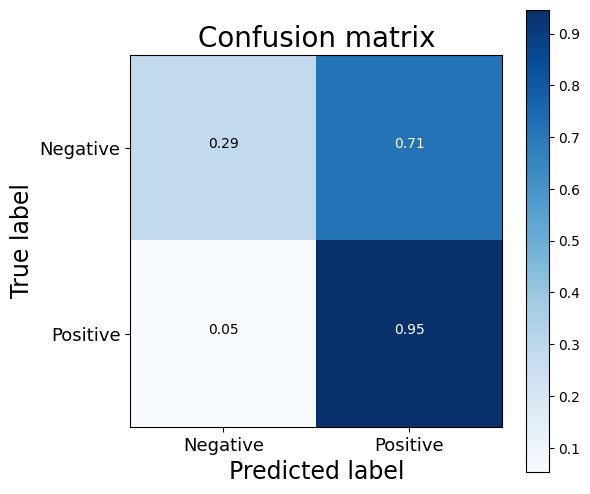

In [ ]:
cnf_matrix = confusion_matrix(actual_sentiment, pred_sentiment)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'], title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(actual_sentiment, pred_sentiment))

              precision    recall  f1-score   support

    Negative       0.36      0.29      0.32       206
    Positive       0.93      0.95      0.94      1994

    accuracy                           0.88      2200
   macro avg       0.64      0.62      0.63      2200
weighted avg       0.87      0.88      0.88      2200



In [ ]:
accuracy_score(actual_sentiment, pred_sentiment)

0.8845454545454545

# Conclusion


The unexpected lower accuracy observed with BERT in our sentiment analysis project can be attributed to several key factors that have shaped our experimentation and model fine-tuning process.

Firstly, the sheer size of the dataset utilized in the initial training phase, consisting of 1.6 million tweets, presented a substantial challenge. Working with such an extensive dataset proved to be computationally intensive and time-consuming during the preprocessing stage. The sheer volume of data required over four hours for basic preprocessing tasks, leading to constraints on computational resources and making it impractical to experiment with multiple models or fine-tune parameters effectively.The scale of the dataset also posed challenges during training, hindering our ability to run models for an extended number of epochs or conduct thorough parameter tuning. As a result, the models lacked the opportunity to learn intricate patterns and relationships within the data due to the limitations imposed by the large dataset size.

While experimenting with two different BERT models and adjusting hyperparameters such as the number of epochs and learning rates, we encountered challenges in achieving conclusive results. Fine-tuning such parameters is crucial for optimizing model performance, but the extensive dataset and resource constraints limited our ability to conduct comprehensive experiments.Despite BERT's remarkable capability to understand nuanced sentiments, especially evident in its classification of statements like "I am not great," challenges emerged when faced with more complex statements. This complexity may have contributed to misclassifications, underscoring the importance of contextual understanding and the inherent limitations of pre-trained models.Moreover, configuring and running the BERT model presented additional hurdles. The computational demands associated with BERT's architecture made the training and validation processes demanding. The intricate nature of the model required careful consideration of hardware capabilities and optimization strategies to ensure efficient execution.

In moving forward, addressing these challenges necessitates a strategic approach. Subsampling the dataset to a manageable size for effective experimentation, optimizing preprocessing pipelines, and considering advanced techniques for model training and validation with BERT can potentially enhance both efficiency and performance. Balancing computational demands with experimental flexibility will be crucial for achieving meaningful insights and refining the sentiment analysis model based on the capabilities of the BERT transformer.

[1] https://github.com/chriskhanhtran/bert-for-sentiment-analysis

[2] https://www.kaggle.com/datasets/kazanova/sentiment140

[3] Nasukawa ,T. & Yi, J. 2003. Sentiment analysis:
capturing favorability using natural language processing.
In Proceedings of the 2nd international conference on
Knowledge capture, October 23–25, 2003. (pp. 70–77).
Florida, USA

[4] Sutskever, I., Vinyals, O. and Le, Q.V. Sequence to sequence learning with neural networks. In Advances in neural
information processing systems (pp. 3104-3112), 2014.

In [ ]:
import io
import nbformat
import glob
nbfile = glob.glob('FinalProjectReport.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file FinalProjectReport.ipynb is 3870
